In [1]:
from PIL import Image, ImageEnhance
import os
import random
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


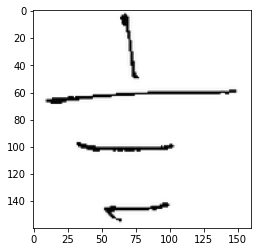

In [ ]:
imshow(image.resize((160,160),Image.ANTIALIAS))

# Binary image random pixel removal

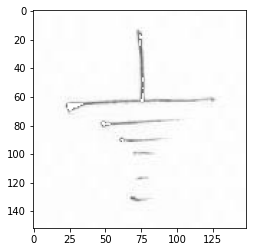

In [ ]:
image_file = Image.open("D:/RESEARCH/Circuit component recognition/train/6/componentl016.bmp")

def binary_augment(image_file):
    image_file = image_file.convert('L') # binary
    image_file = image_file.point(lambda p: 255 if p < random.randint(100,110) else p)
    image_file = image_file.convert('RGB') # mono
    return image_file

image = binary_augment(image_file)
# image.save("trial.bmp")
imshow(binary_augment(image_file))

# Brightness

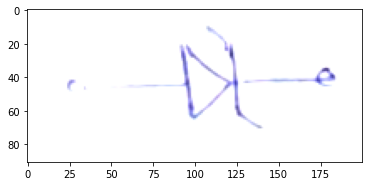

In [ ]:
image_file = Image.open("/content/drive/MyDrive/data/train/5/componentl001.bmp")
def brightness(image_file):
    image_file = ImageEnhance.Brightness(image_file)
    return image_file.enhance(1.5)

imshow((brightness(image_file)))

# Random rotation (-20 to -10) or (10 to 20)

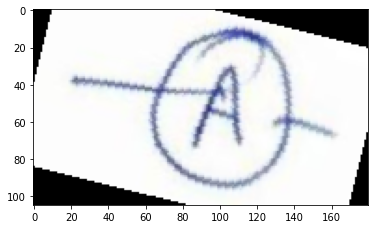

In [ ]:
img = Image.open("/content/drive/MyDrive/data/train/2/componentl001.bmp")
def rotator(img):
  decider = random.randint(1,2)
  if decider == 1:
    img = img.rotate(random.randint(10,20))
  else:
    img = img.rotate(random.randint(-20,-10)) 
  return img 

imshow(rotator(img)) 

# Contrast

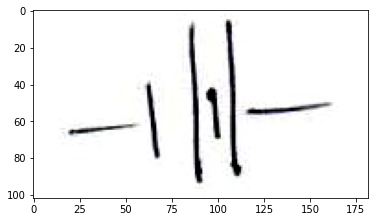

In [ ]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("/content/drive/MyDrive/data/train/5/componentl001.bmp")
def contraster(im):
  #image brightness enhancer
  enhancer = ImageEnhance.Contrast(im)
  return enhancer.enhance(1.75)

imshow(contraster(im))  

# Dilation based thickening

{0: 16148, 255: 2416}


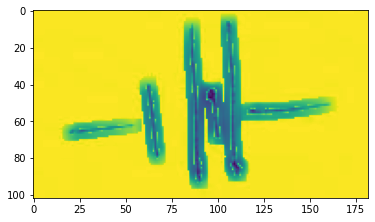

In [15]:
import cv2
img = cv2.imread("/content/drive/MyDrive/data/train/5/componentl001.bmp", cv2.IMREAD_GRAYSCALE)

def masking(img,i,j,z):
  arr = []
  avg = []
  for k in range(-z,z):
    for l in range(-z,z):
      arr.append(img[i-k][j-l])
  arr.sort()
  for w in range(0,round((len(arr)-1)/2)):
    avg.append(arr[w])
  return (sum(avg)/((len(arr)-1)/2)) #avg of first half after sorting to get the darker values.

def dilation_thick(img):
  org_img = img #original image
  mod_img = img #image to be modified
  img = 255 - img
  (thresh, img) = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)
  kernel = np.ones((7,7), np.uint8)
  img_dilation = cv2.dilate(img, kernel, iterations=1) #dilated image
  difference = img_dilation-img 
  unique,counts = np.unique(difference,return_counts=True)
  print(dict(zip(unique, counts)))
  for i in range(img.shape[0]): # height
    for j in range(img.shape[1]): # width
      if (difference[i][j]==0):
        mod_img[i][j] = org_img[i][j]
      else:
        try:
          mod_img[i][j] = masking(org_img,i,j,5)
        except:
          mod_img[i][j] = org_img[i][j]
  (thresh, bin_mod) = cv2.threshold(mod_img, 40, 255, cv2.THRESH_BINARY)                   
  return mod_img

imshow(dilation_thick(img))

# Saving the augmented images

In [16]:
for i in range(1,21):
  folder = "/content/drive/MyDrive/data/train/"+str(i)+"/"
  for image in os.listdir(os.path.join(folder)):
      #print(image[13:17])
      if image[13:17] == ".bmp":
          print(os.path.join(folder,image))
          img = Image.open(os.path.join(folder,image))
          img_cv = cv2.imread(os.path.join(folder,image), cv2.IMREAD_GRAYSCALE)
          rotated_pos = img.rotate(random.randint(1,10)) # random positive angle rotation
          rotated_neg = img.rotate(random.randint(-10,-1)) # random negative angle rotation
          bin_img = binary_augment(img)
          bright_img = brightness(img)
          contrast_img = contraster(img)
          rot_img = rotator(img)
          dilation_img = dilation_thick(img_cv)
    
          rotated_pos.save(folder+image[0:13]+"rotpos"+".bmp")
          rotated_neg.save(folder+image[0:13]+"rotneg"+".bmp")
          bin_img.save(folder+image[0:13]+"binfil"+".bmp")
          bright_img.save(folder+image[0:13]+"bright"+".bmp")
          contrast_img.save(folder+image[0:13]+"contrast"+".bmp")
          rot_img.save(folder+image[0:13]+"arbirot"+".bmp")
          cv2.imwrite(folder+image[0:13]+"dilated"+".bmp",dilation_img)

/content/drive/MyDrive/data/train/1/componentl032.bmp
{0: 19274, 255: 2790}
/content/drive/MyDrive/data/train/1/componentl035.bmp
{0: 30537, 255: 4059}
/content/drive/MyDrive/data/train/1/componentl046.bmp
{0: 37794, 255: 4929}
/content/drive/MyDrive/data/train/1/componentl047.bmp
{0: 19279, 255: 2576}
/content/drive/MyDrive/data/train/1/componentl043.bmp
{0: 21699, 255: 3193}
/content/drive/MyDrive/data/train/1/componentl050.bmp
{0: 17200, 255: 3091}
/content/drive/MyDrive/data/train/1/componentl029.bmp
{0: 18904, 255: 2963}
/content/drive/MyDrive/data/train/1/componentl048.bmp
{0: 11190, 255: 1517}
/content/drive/MyDrive/data/train/1/componentl042.bmp
{0: 26789, 255: 2605}
/content/drive/MyDrive/data/train/1/componentl044.bmp
{0: 16084, 255: 2060}
/content/drive/MyDrive/data/train/1/componentl040.bmp
{0: 14208, 255: 2046}
/content/drive/MyDrive/data/train/1/componentl049.bmp
{0: 18826, 255: 3350}
/content/drive/MyDrive/data/train/1/componentl033.bmp
{0: 22011, 255: 3189}
/content/dri

# Removing black offsets in rotated images

In [ ]:
import cv2
for i in range(1,21):
  folder = "/content/drive/MyDrive/data/train/"+str(i)+"/"

  for z in range(10,51):
      img = cv2.imread(folder+"componentl0"+str(z)+"arbirot.bmp")
      height, width, _ = img.shape
      for i in range(height):
          for j in range(width):
              # img[i, j] is the RGB pixel at position (i, j)
              # check if it's [0, 0, 0] and replace with [255, 255, 255] if so
              if img[i, j].sum() == 0:
                  img[i, j] = [255, 255, 255]
      cv2.imwrite(folder+"componentl0"+str(z)+"arbirot.bmp",img)   
      
  for z in range(1,10):
      img = cv2.imread(folder+"componentl00"+str(z)+"arbirot.bmp")
      height, width, _ = img.shape
      for i in range(height):
          for j in range(width):
              # img[i, j] is the RGB pixel at position (i, j)
              # check if it's [0, 0, 0] and replace with [255, 255, 255] if so
              if img[i, j].sum() == 0:
                  img[i, j] = [255, 255, 255]
      cv2.imwrite(folder+"componentl00"+str(z)+"arbirot.bmp",img)                      